In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load trade data
file_path = "uk_trade.xlsx"  # Update with your actual file path
df = pd.read_excel("trade_world_15to23.xlsx")

# Rename columns for easier merging
df.columns = ["Country", "Trade_2015", "Trade_2019", "Trade_2023"]

In [11]:
# Load built-in world map
shapefile_path = "C:/Users/musta/Desktop/IBA/Semester 5/DAE/geo panda countries/ne_110m_admin_0_countries.shp"

world = gpd.read_file(shapefile_path)

# Merge trade data with world map
world = world.merge(df, left_on="SOVEREIGNT", right_on="Country", how="left")

In [13]:
eu_countries = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", 
    "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", 
    "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", 
    "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"]

eu = world[world["SOVEREIGNT"].isin(eu_countries)]

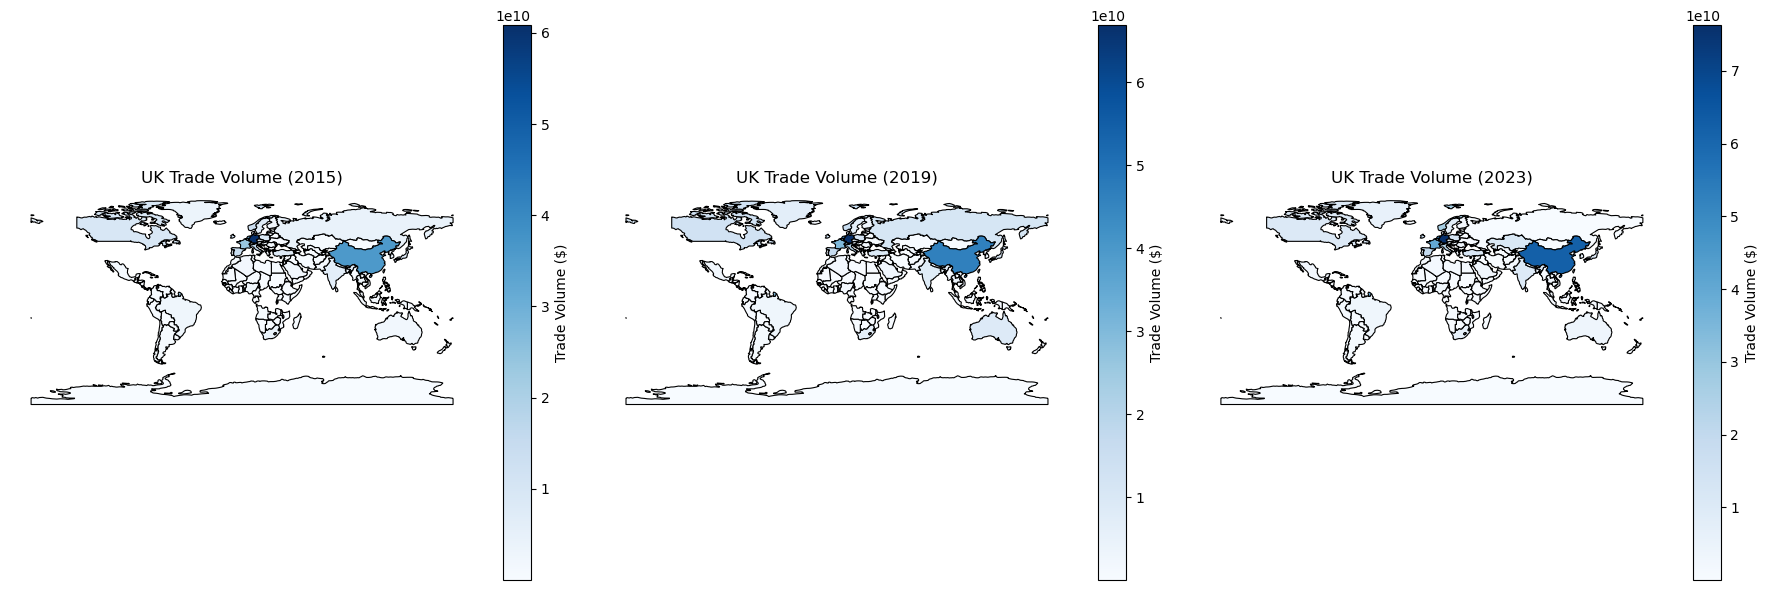

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

years = ["Trade_2015", "Trade_2019", "Trade_2023"]
titles = ["UK Trade Volume (2015)", "UK Trade Volume (2019)", "UK Trade Volume (2023)"]

for i, year in enumerate(years):
    world.plot(column=year, cmap="Blues", linewidth=0.8, edgecolor="black",
               legend=True, legend_kwds={"label": "Trade Volume (£)"},
               ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].axis("off")

plt.tight_layout()
plt.show()


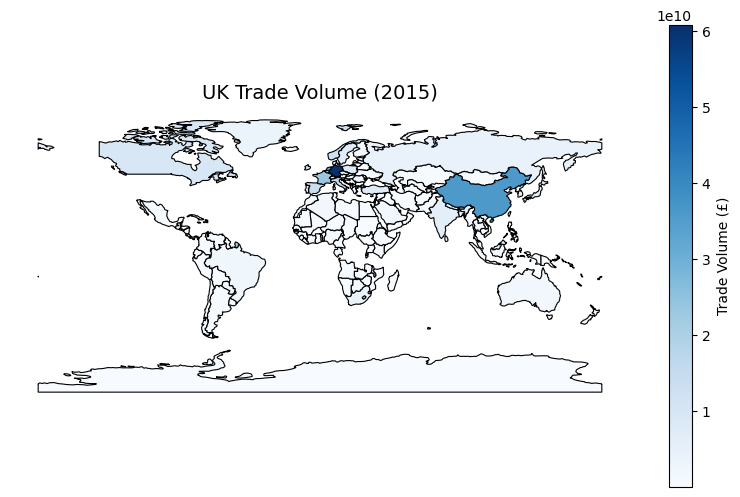

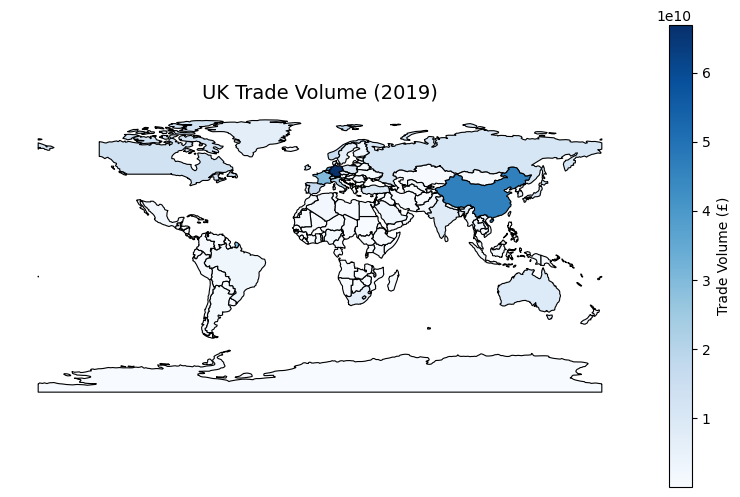

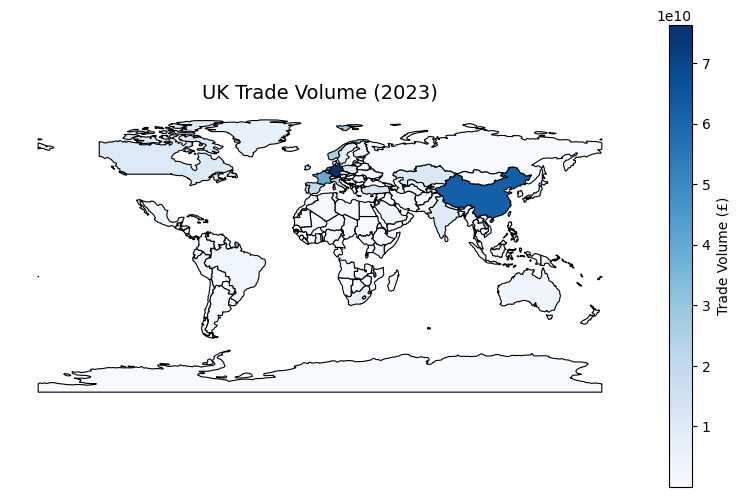

In [16]:
years = ["Trade_2015", "Trade_2019", "Trade_2023"]
titles = ["UK Trade Volume (2015)", "UK Trade Volume (2019)", "UK Trade Volume (2023)"]

for i, year in enumerate(years):
    fig, ax = plt.subplots(figsize=(10, 6))  # Larger figure size for better visibility
    
    world.plot(column=year, cmap="Blues", linewidth=0.8, edgecolor="black",
               legend=True, legend_kwds={"label": "Trade Volume (£)"},
               ax=ax)
    
    ax.set_title(titles[i], fontsize=14)
    ax.axis("off")
    
    plt.show()  # Show one plot at a time


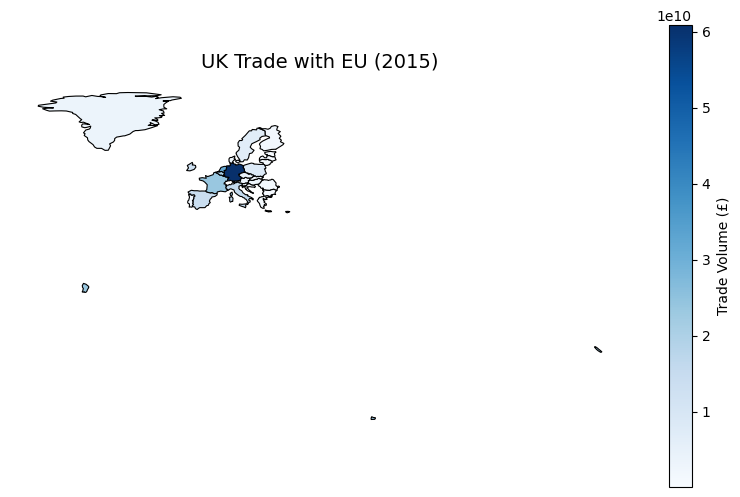

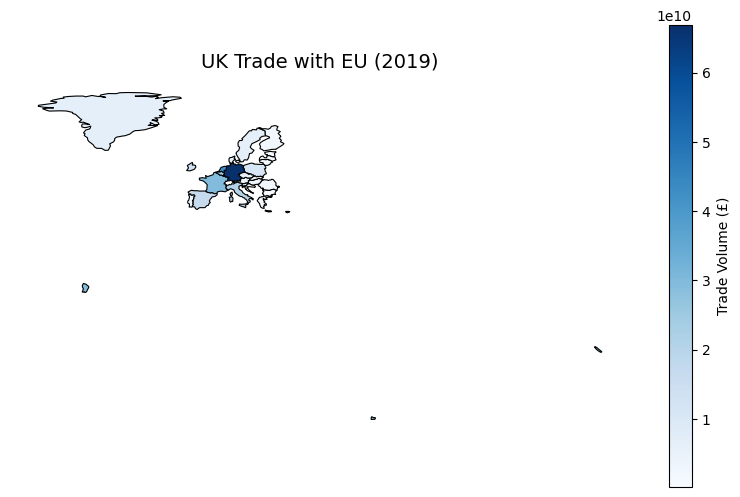

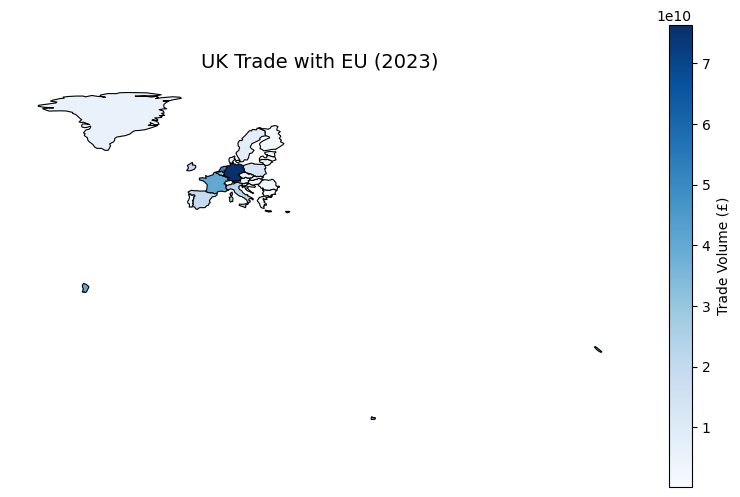

In [19]:
years = ["Trade_2015", "Trade_2019", "Trade_2023"]
titles = ["UK Trade with EU (2015)", "UK Trade with EU (2019)", "UK Trade with EU (2023)"]

for i, year in enumerate(years):
    fig, ax = plt.subplots(figsize=(10, 6))  # Bigger figure size for clarity
    
    eu.plot(column=year, cmap="Blues", linewidth=0.8, edgecolor="black",
            legend=True, legend_kwds={"label": "Trade Volume (£)"},
            ax=ax)
    
    ax.set_title(titles[i], fontsize=14)
    ax.axis("off")
    
    plt.show()  # Show one map at a time


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
data = pd.read_excel("gravitymodel_data.xlsx")

data['ln_distance'] = np.log(data['Distance (km)'])
data['ln_GDP'] = np.log(data['GDP (£)'])
data['ln_UK GDP'] = np.log(data['UK GDP (£)'])
data['ln_trade'] = np.log(data['Trade Value (£)'])

In [5]:
#X = data[['Distance (km)', 'GDP (£)', 'UK GDP (£)']]  # predictors
#y = data['Trade Value (£)']  # Target variable

X = data[['ln_distance', 'ln_GDP', 'ln_UK GDP']]  # predictors
y = data['ln_trade']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Check the size of the splits
print(f"Training data size: {X_train.shape[0]} samples")
print(f"Test data size: {X_test.shape[0]} samples")

Training data size: 100 samples
Test data size: 67 samples


Linear Regression:
  MSE: 1.581, 
  R²: 0.835
  MAE: 0.9580
  RMSE: 1.2575

        Feature  Coefficient
0  ln_distance    -0.617979
1       ln_GDP     1.126602
2    ln_UK GDP    -0.506250

Ridge Regression:
  MSE: 1.609, R²: 0.833
  MAE: 0.9914
  RMSE: 1.2683

Lasso Regression:
  MSE: 2.144, R²: 0.777
  MAE: 1.2137
  RMSE: 1.4641


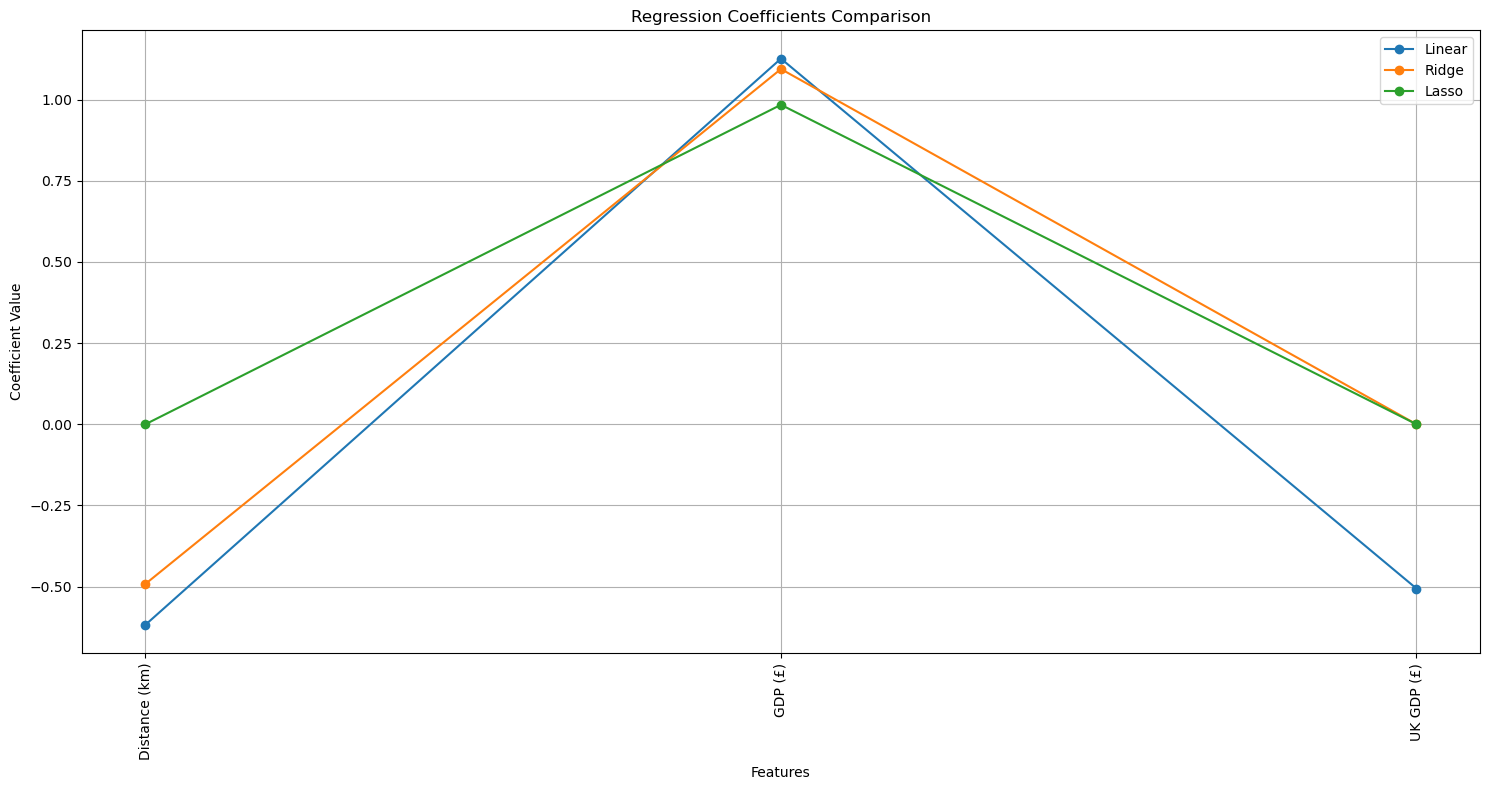

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
ridge_model = Ridge(alpha=20.0)  # Adjust alpha as needed
lasso_model = Lasso(alpha=1.0)  # Adjust alpha as needed

# Fit the models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the models
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Linear Regression:")
print(f"  MSE: {mse_linear:.3f}, \n  R²: {r2_linear:.3f}")
print(f"  MAE: {mae_linear:.4f}")
print(f"  RMSE: {rmse_linear:.4f}")

coef_df = pd.DataFrame({
    'Feature': X_train.columns,  # Extract feature names
    'Coefficient': linear_model.coef_
})

print("\n", coef_df)

print("\nRidge Regression:")
print(f"  MSE: {mse_ridge:.3f}, R²: {r2_ridge:.3f}")
print(f"  MAE: {mae_ridge:.4f}")
print(f"  RMSE: {rmse_ridge:.4f}")
print("\nLasso Regression:")
print(f"  MSE: {mse_lasso:.3f}, R²: {r2_lasso:.3f}")
print(f"  MAE: {mae_lasso:.4f}")
print(f"  RMSE: {rmse_lasso:.4f}")



# Plot coefficients for comparison
models = ['Linear', 'Ridge', 'Lasso']
coefs = [linear_model.coef_, ridge_model.coef_, lasso_model.coef_]

plt.figure(figsize=(15, 8))
for i, model in enumerate(models):
    plt.plot(range(len(coefs[i])), coefs[i], marker='o', label=model)

features = ['Distance (km)', 'GDP (£)', 'UK GDP (£)']
plt.xticks(range(len(features)), features, rotation=90)

plt.title('Regression Coefficients Comparison')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(
    criterion='squared_error',  # Criterion to measure quality of split
    splitter='best',  # Best split strategy
    max_depth=None,   # No limit on depth (will grow until stopping conditions)
    min_samples_split=2,  # Minimum samples required to split a node
    min_samples_leaf=1,   # Minimum samples required to be at a leaf node
    min_weight_fraction_leaf=0.0,  # No minimum weight for the fraction of samples
    max_features=None,  # Consider all features for each split
    random_state=42,  # Random seed for reproducibility
    max_leaf_nodes=None,  # No limit on leaf nodes
    min_impurity_decrease=0.0,  # No minimum impurity decrease for splits
    ccp_alpha=0.0,  # No pruning
)

regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [20]:
# Predict on the training data and test data
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# R² for both training and test data
r2_train = regressor.score(X_train, y_train)
r2_test = regressor.score(X_test, y_test)

# Adjusted R² for both training and test data
n_train = X_train.shape[0]  # Number of training samples
p = X_train.shape[1]  # Number of features
adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)

n_test = X_test.shape[0]  # Number of test samples
adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)

# MAE, MSE, and RMSE for both training and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Display all metrics for both training and test data
print(f"Training Data R²: {r2_train:.4f}")
print(f"Test Data R²: {r2_test:.4f} \n")
print(f"Training Data Adjusted R²: {adj_r2_train:.4f}")
print(f"Test Data Adjusted R²: {adj_r2_test:.4f} \n")
print(f"Training Data MAE: {mae_train:.4f}")
print(f"Test Data MAE: {mae_test:.4f} \n")
print(f"Training Data MSE: {mse_train:.4f}")
print(f"Test Data MSE: {mse_test:.4f} \n")
print(f"Training Data RMSE: {rmse_train:.4f}")
print(f"Test Data RMSE: {rmse_test:.4f}")

Training Data R²: 1.0000
Test Data R²: 0.6930 

Training Data Adjusted R²: 1.0000
Test Data Adjusted R²: 0.6783 

Training Data MAE: 0.0000
Test Data MAE: 1.3472 

Training Data MSE: 0.0000
Test Data MSE: 2.9505 

Training Data RMSE: 0.0000
Test Data RMSE: 1.7177


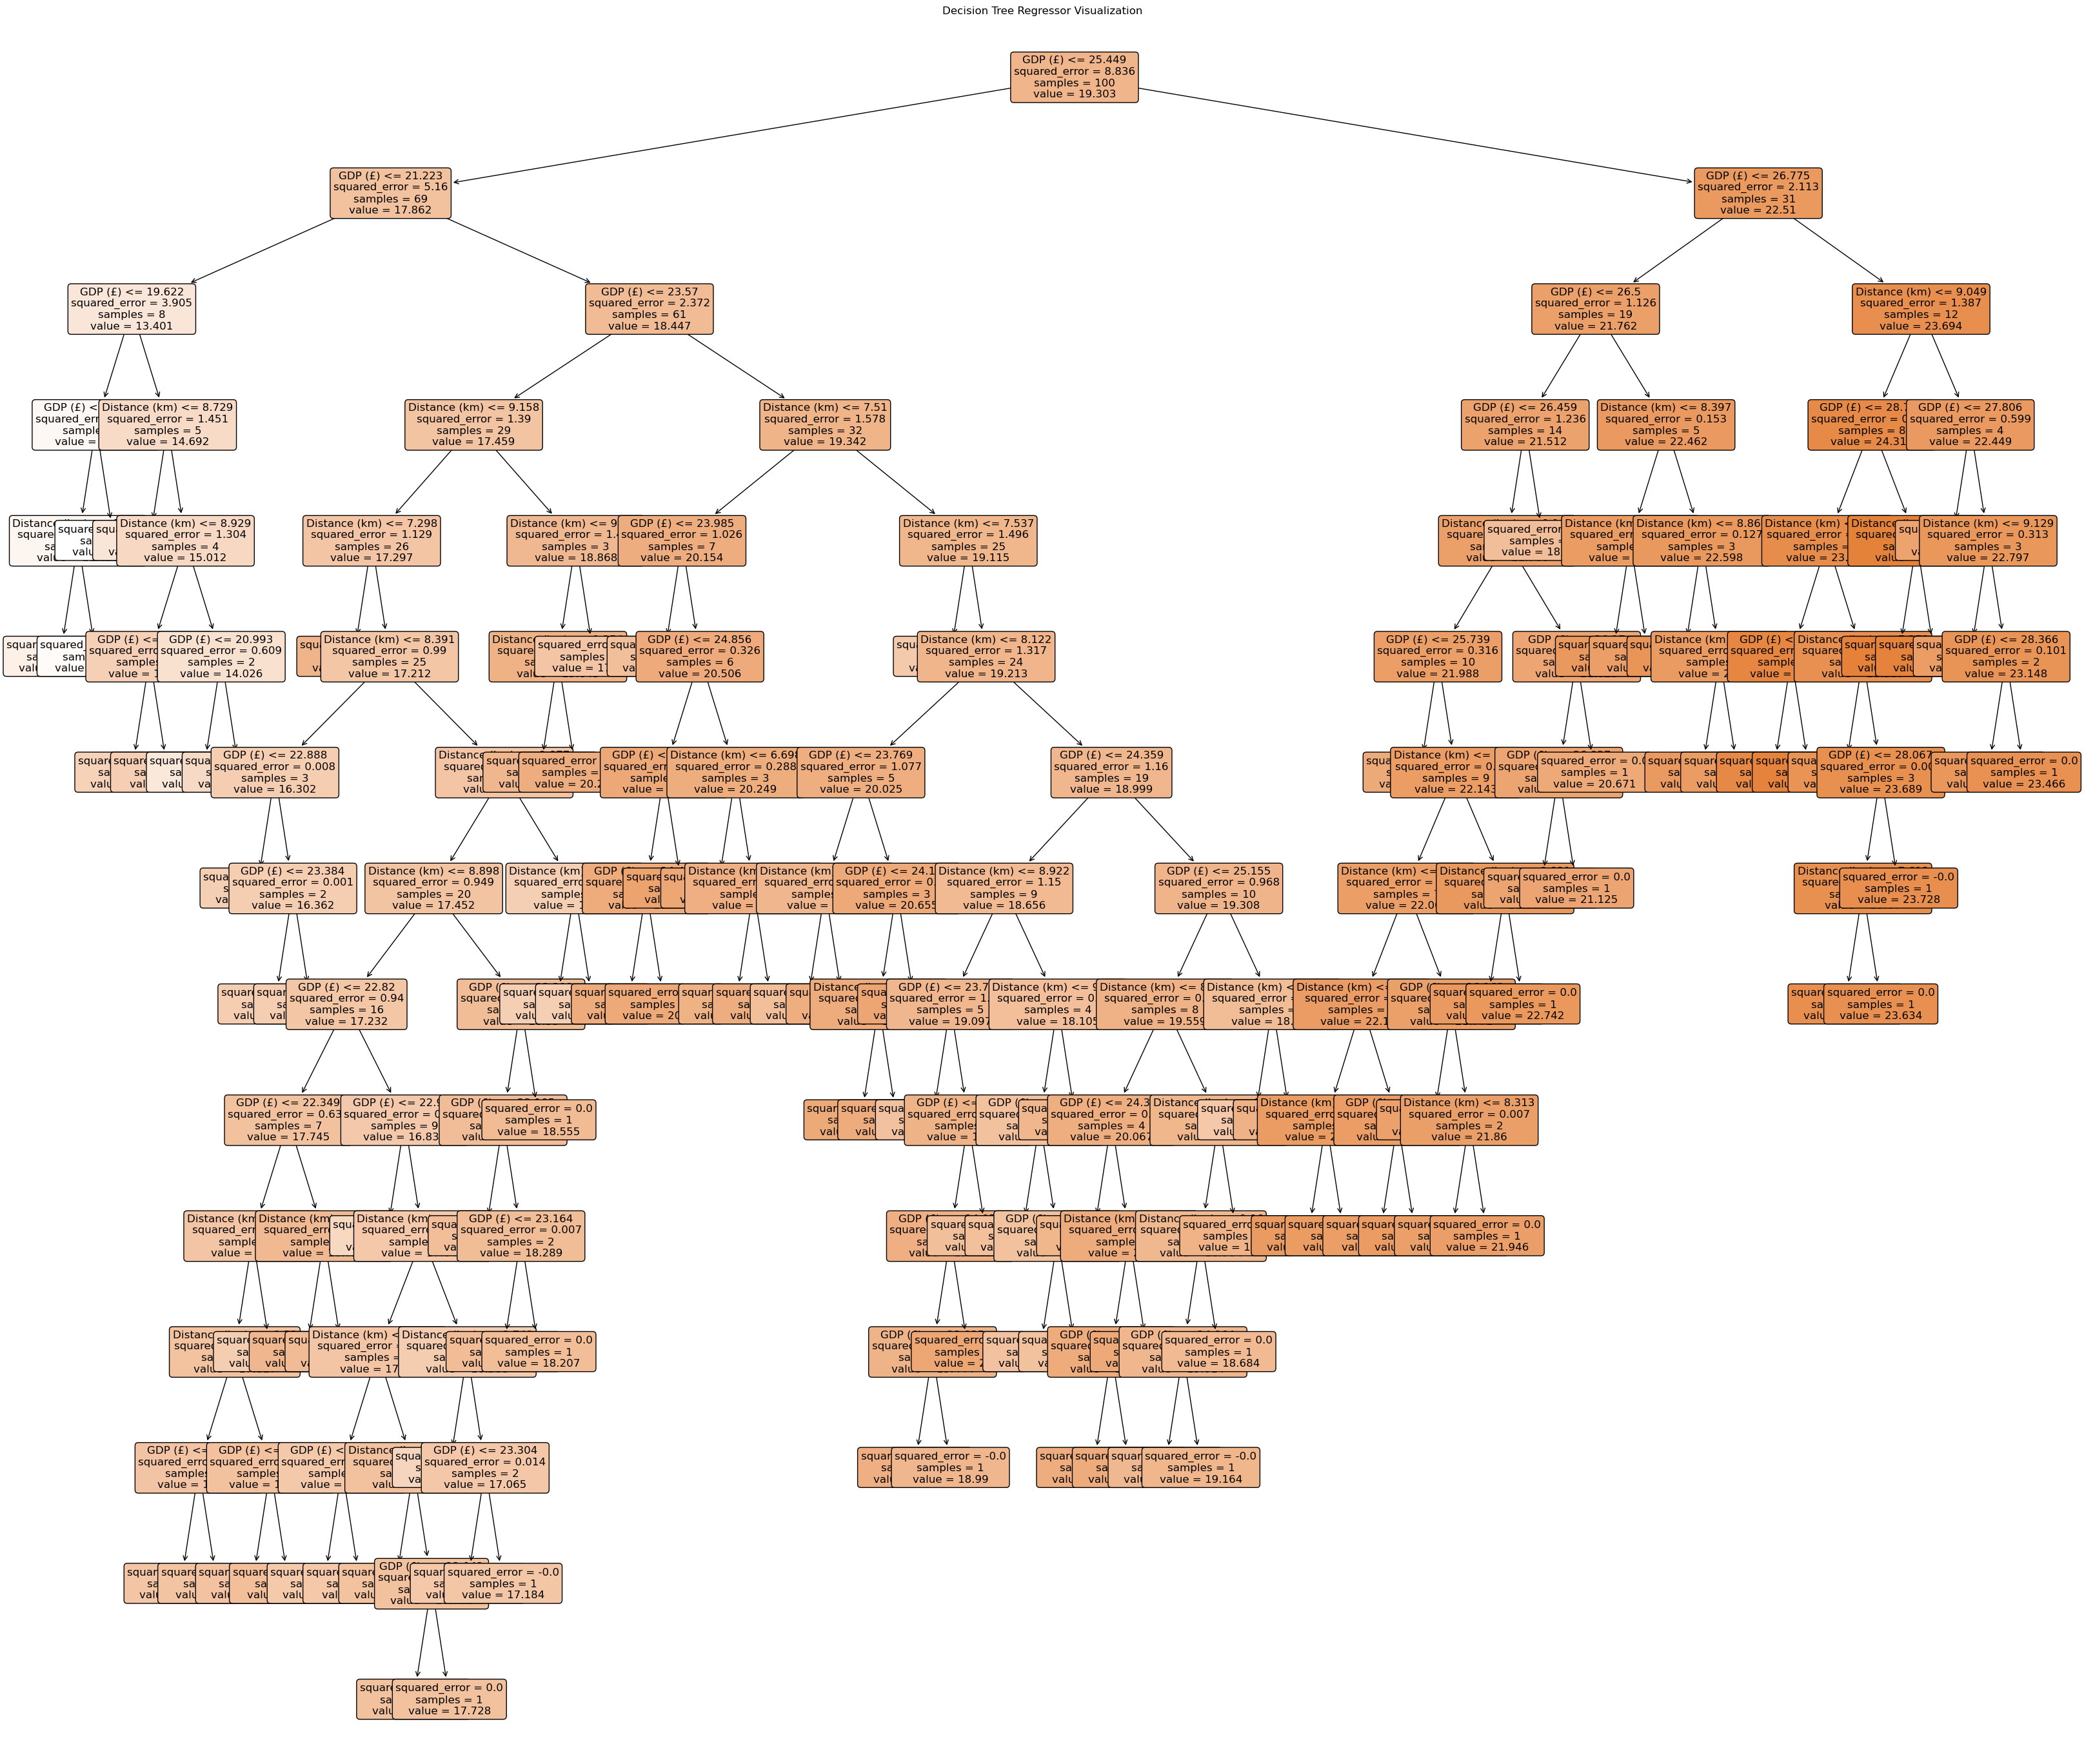

In [21]:
from sklearn.tree import plot_tree

# Plot the trained Decision Tree with matplotlib
plt.figure(figsize=(40, 35))  # Adjust the size to make it larger
plot_tree(
    regressor, 
    filled=True, 
    feature_names= features,  # Feature names
    rounded=True, 
    fontsize=12
)
plt.title("Decision Tree Regressor Visualization")
plt.show()